In [6]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [7]:
image_dir = './data/all_data'
i=0
resize_size = (224,224)  # Desired size for resizing

# List to store all image data
pixel_data = []

# Iterate through each file in the image directory
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):  # Check for image files
        image_path = os.path.join(image_dir, filename)
        with Image.open(image_path) as img:
            img = img.convert('L')  # Convert to grayscale
            img = img.resize(resize_size, Image.Resampling.LANCZOS)
            img_array = np.array(img)  # Convert image to numpy array
            pixel_data.append(img_array)
            
    if i == 200:
        break
    i=i+1

# Convert list to numpy array for batch processing
pixel_data = np.array(pixel_data)

# Calculate the mean and standard deviation across all images
mean = np.mean(pixel_data)
std = np.std(pixel_data)

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 237.15432019292092
Standard Deviation: 55.28845329408394


In [8]:
img_path = './viewer4.png'  # Ensure this path is correct
image = Image.open(img_path)

In [9]:
def img_transformation(img_crop_size):
    return transforms.Compose([
        transforms.Resize((img_crop_size, img_crop_size)),  # Resize the image
        transforms.ToTensor(),  # Convert the image to tensor
        transforms.Normalize([0.930213], [0.216819]),  # Normalize the image
        transforms.Lambda(lambda x: (x > 0.01).float())  # Binarize the image
    ])

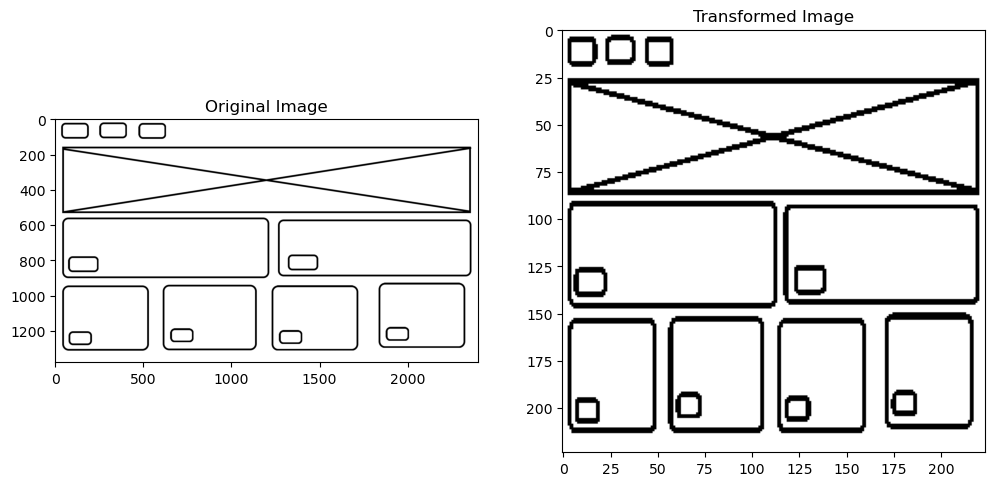

In [10]:
# Apply the transformation
transformed_image = img_transformation(224)(image)

# Function to convert tensor to image for displaying
def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Transformed Image')
imshow(transformed_image)
plt.show()